# CMS Survey – 2021 Supplement

[data user guide](https://www.cms.gov/files/document/2021mcbscovidpufdugwinter.pdf)<br/>
[data dictionary](https://www.cms.gov/files/document/covidpuf32021wtxt.txt)

---



In [1]:
import pandas as pd
import numpy as np
import imblearn.over_sampling
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style("whitegrid")
%matplotlib inline


In [80]:
raw_df = pd.read_csv('/Users/sandraparedes/Documents/GitHub/metis_dsml/03_business/business-project/COVIDPUF_3_2021W.csv')


/var/folders/9q/517kb3kd6rz7pq25y7fyk9w00000gn/T/ipykernel_6934/1116900801.py:1: DtypeWarning: Columns (13,18,26,27,33,34,35,36,37,39,40,41,42,45,46,47,48,50,51,52,53,55,56,57,58,59,60,63,64,69,70,72,73,74,75,76,77,79,82,84,86,87,89,90,91,92,93,94,96,97,99,100,101,102,103,104,106,107,108,109,110,111,121,125,128,131,138,141,144,145,151,169,175,178,179,180,181,182,183,184,195,197,199,200,227,260,261,272,273,275,276,279,285,286,288) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('/Users/sandraparedes/Documents/GitHub/metis_dsml/03_business/business-project/COVIDPUF_3_2021W.csv')


In [4]:
raw_df.head()

,COVID_ID,CVROUND,VERSION,INV_LANG,INV_SPPROXY,INV_INTWEEK,DMV_AGECAT,DMV_SEX,DMV_RACE,DMV_RE_AGE,...,CPWW091,CPWW092,CPWW093,CPWW094,CPWW095,CPWW096,CPWW097,CPWW098,CPWW099,CPWW100
0,30000000,3,2,1,1,2,3,2,1,4,...,435.965791,2505.848919,2379.345341,2675.752901,2596.852459,2407.851607,2720.965387,2550.298536,2780.345626,2597.082212
1,30000002,3,2,1,1,2,1,1,2,5,...,10837.698222,1825.324962,11078.901211,1522.261174,9567.902971,1703.074223,9414.051628,1929.779385,9343.571142,9505.369751
2,30000008,3,2,2,2,2,1,1,3,9,...,8314.359369,1567.967069,8600.913483,9835.358147,1917.824089,2001.396851,10259.059361,1654.717885,8728.026062,8988.199795
3,30000012,3,1,1,1,3,3,2,1,3,...,13770.454630,2538.470020,15261.630618,16424.383249,3493.216450,15084.575464,2652.290723,14574.329559,2994.345476,2310.208917
4,30000013,3,2,1,1,1,3,2,1,3,...,1748.326126,1753.924920,1748.459845,8114.691171,10106.008771,1454.486806,2129.375432,1787.061166,1617.464375,8887.002940


In [5]:
raw_df.describe()

,COVID_ID,CVROUND,VERSION,INV_LANG,INV_SPPROXY,INV_INTWEEK,DMV_AGECAT,DMV_SEX,DMV_RACE,DMV_RE_AGE,...,CPWW091,CPWW092,CPWW093,CPWW094,CPWW095,CPWW096,CPWW097,CPWW098,CPWW099,CPWW100
count,1.110700e+04,11107.0,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,...,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000
mean,3.001505e+07,3.0,1.385883,1.050509,1.121725,2.634105,2.323490,1.548123,1.462861,4.247231,...,5179.730900,5115.707336,5200.489954,5144.443113,5173.216414,5175.895986,5174.166772,5165.635111,5198.610091,5131.639778
std,8.626182e+03,0.0,0.486825,0.219002,0.326983,1.727235,0.733342,0.497701,0.878205,3.370927,...,5678.951304,5407.004334,5465.300493,5471.969177,5487.484904,5474.679253,5454.294054,5516.502469,5569.851291,5492.712804
min,3.000000e+07,3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.312461,86.982687,89.760083,92.264842,79.015153,85.715472,94.573540,102.991710,99.463641,111.899255
25%,3.000762e+07,3.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,1350.017383,1374.197878,1368.217509,1364.489434,1324.565405,1354.546825,1350.658705,1362.388577,1368.775257,1377.623000
50%,3.001507e+07,3.0,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,...,2845.089119,2885.507479,3087.582561,2920.067345,2890.049879,3070.333389,2947.892407,2851.982908,2878.164013,2903.767970
75%,3.002251e+07,3.0,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,...,7654.550266,7565.466813,7760.123336,7626.803116,7831.863012,7793.158882,7821.852962,7721.920739,7746.179480,7588.648674
max,3.003000e+07,3.0,2.000000,2.000000,2.000000,8.000000,3.000000,2.000000,4.000000,14.000000,...,102193.055180,78694.411136,69795.330112,66689.793249,63679.471936,62394.441958,64970.720259,69948.210537,71894.652485,69310.525265


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Columns: 390 entries, COVID_ID to CPWW100
dtypes: float64(149), int64(13), object(228)
memory usage: 33.0+ MB


In [7]:
raw_df.columns

Index(['COVID_ID', 'CVROUND', 'VERSION', 'INV_LANG', 'INV_SPPROXY',
       'INV_INTWEEK', 'DMV_AGECAT', 'DMV_SEX', 'DMV_RACE', 'DMV_RE_AGE',
       ...
       'CPWW091', 'CPWW092', 'CPWW093', 'CPWW094', 'CPWW095', 'CPWW096',
       'CPWW097', 'CPWW098', 'CPWW099', 'CPWW100'],
      dtype='object', length=390)

In [78]:
raw_df.iloc[:, 3:17:].head()

,INV_LANG,INV_SPPROXY,INV_INTWEEK,DMV_AGECAT,DMV_SEX,DMV_RACE,DMV_RE_AGE,DMV_CBSA,DMV_REGION,DMV_INCOME,DMV_OTHRLANG,DMV_H_OPMDCD,DMV_MA_FLAG,DMV_PARTD
0,1,1,2,3,2,1,4,2.0,3.0,1,2.0,3,1.0,1.0
1,1,1,2,1,1,2,5,1.0,1.0,2,2.0,2,1.0,1.0
2,2,2,2,1,1,3,9,1.0,4.0,2,1.0,2,3.0,1.0
3,1,1,3,3,2,1,3,1.0,1.0,2,2.0,2,1.0,1.0
4,1,1,1,3,2,1,3,1.0,4.0,1,2.0,2,3.0,1.0


`INV_LANG`           
LANG                          Language interview conducted in          
                              10,546                  1  English                                                                    
                                 561                  2  Spanish                                                                                  
 
`DMV_AGECAT`         
AGECAT                        Age group                                
                               1,771                  1  < 65 years                                                                 
                               3,972                  2  65-74 years                                                                
                               5,364                  3  75+ years                                                                  
 
`DMV_SEX`            
SEXF                          Gender                                   
                               5,019                  1  Male                                                                       
                               6,088                  2  Female                                                      

In [77]:
raw_df.iloc[:, 19:27:].head()

,ACV_TELMED,ACV_TELMEDT1,ACV_TELMEDBE,ACV_TELMEDT2,ACV_TELMEDDU,ACV_TELMEDT3,ACV_TELMEDUS,ACV_TELMEDT4
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2,NaN,1,2,1,2
2,1,1,2,NaN,1,1,1,1
3,1,3,2,NaN,2,NaN,1,1
4,1,3,2,NaN,2,NaN,1,3


`ACV_TELMED`         
YESNODK                       PCP offers telehealth appointments       
                               2,294                  D  Don't know                                                                 
                                 506                  .  Inapplicable/Missing                                                       
                                   1                  R  Refused                                                                    
                               6,491                  1  Yes                                                                        
                               1,815                  2  No                                                                         
         Notes:  Applies only if ACV_PLACPART = 1.
                 First available in 2020
 
`ACV_TELMEDT1`       
TELEVID                       Type of telehealth offered               
                                 769                  D  Don't know                                                                 
                               4,616                  .  Inapplicable/Missing                                                       
                                   4                  R  Refused                                                                    
                               1,339                  1  Telephone                                                                  
                                 415                  2  Video                                                                      
                               3,964                  3  Both                                                                       
         Notes:  Applies only if ACV_TELMED = 1.
                 First available in 2020
 
`ACV_TELMEDDU`       
YESNODK                       SP offered telehealth since 11/1/20      
                                 147                  D  Don't know                                                                 
                               4,616                  .  Inapplicable/Missing                                                       
                                   1                  R  Refused                                                                    
                               3,183                  1  Yes                                                                        
                               3,160                  2  No                                                                         
         Notes:  Applies only if ACV_TELMED = 1.
                 First available in 2020
 
 
`ACV_TELMEDUS`       
YESNODK                       SP had telehealth visit since 11/1/20    
                                  60                  D  Don't know                                                                 
                               4,616                  .  Inapplicable/Missing                                                       
                                   1                  R  Refused                                                                    
                               2,948                  1  Yes                                                                        
                               3,482                  2  No                                                                         
         Notes:  Applies only if ACV_TELMED = 1.
                 First available in Fall 2020 COVID round.
 
`ACV_TELMEDT4`       
TELEVID                       Type of telehealth visit had 11/1/20     
                                   6                  D  Don't know                                                                 
                               8,159                  .  Inapplicable/Missing                                                       
                               1,620                  1  Telephone                                                                  
                                 825                  2  Video                                                                      
                                 497                  3  Both                                                                       
         Notes:  Applies only if ACV_TELMEDUS = 1.
                 First available in Fall 2020 COVID round.

In [76]:
raw_df.iloc[:, 28:32:].head()

,ACV_COMPPHON,ACV_COMPTAB,ACV_INTERNET,ACV_AUDIOVID
0,2,2,2,2
1,1,1,1,1
2,1,2,2,1
3,1,1,1,1
4,1,1,1,2


`ACV_COMPDESK`      
YESNODK   COMPUTER            Own computer                             
                                  26                  D  Don't know                                                                 
                                   4                  R  Refused                                                                    
                               6,786                  1  Yes                                                                        
                               4,291                  2  No                                                                         
                 First available in 2020
 
`ACV_COMPPHON`       
YESNODK   COMPUTER            Own smartphone                           
                                 117                  D  Don't know                                                                 
                                   4                  R  Refused                                                                    
                               7,164                  1  Yes                                                                        
                               3,822                  2  No                                                                         
                 First available in 2020
 
`ACV_COMPTAB`        
YESNODK   COMPUTER            Own tablet                               
                                  21                  D  Don't know                                                                 
                                   6                  R  Refused                                                                    
                               4,574                  1  Yes                                                                        
                               6,506                  2  No                                                                         
                 First available in 2020
 
`ACV_INTERNET`       
YESNODK                       Access to Internet                       
                                  47                  D  Don't know                                                                 
                                   3                  R  Refused                                                                    
                               8,866                  1  Yes                                                                        
                               2,191                  2  No                                                                         
                 First available in 2020
 
`ACV_AUDIOVID`
YESNODK                       Use video or voice calls                 
                                  44                  D  Don't know                                                                 
                                   3                  R  Refused                                                                    
                               4,977                  1  Yes                                                                        
                               6,083                  2  No                                                                         
                 First available in 2020
 
`ACV_COVIDCAR`       
YESNODK                       Unable to get care bc of CV19 since 11/1 
                                  51                  D  Don't know                                                                 
                                   3                  R  Refused                                                                    
                                 680                  1  Yes                                                                        
                              10,373                  2  No                                                                         
                 First available in 2020

In [33]:
sub_df = df[['INV_LANG', 
            'DMV_AGECAT', 
            'DMV_SEX', 
            'ACV_TELMED', 
            'ACV_TELMEDT1',
            'ACV_TELMEDDU', 
            'ACV_TELMEDUS', 
            'ACV_TELMEDT4', 
            'ACV_COMPPHON', 
            'ACV_COMPTAB', 
            'ACV_INTERNET', 
            'ACV_AUDIOVID']]
sub_df.head()

,INV_LANG,DMV_AGECAT,DMV_SEX,ACV_TELMED,ACV_TELMEDT1,ACV_TELMEDDU,ACV_TELMEDUS,ACV_TELMEDT4,ACV_COMPPHON,ACV_COMPTAB,ACV_INTERNET,ACV_AUDIOVID
0,1,3,2,2,NaN,NaN,NaN,NaN,2,2,2,2
1,1,1,1,1,2,1,1,2,1,1,1,1
2,2,1,1,1,1,1,1,1,1,2,2,1
3,1,3,2,1,3,2,1,1,1,1,1,1
4,1,3,2,1,3,2,1,3,1,1,1,2


In [32]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   INV_LANG      11107 non-null  int64 
 1   DMV_AGECAT    11107 non-null  int64 
 2   DMV_SEX       11107 non-null  int64 
 3   ACV_TELMED    10601 non-null  object
 4   ACV_TELMEDT1  6491 non-null   object
 5   ACV_TELMEDDU  6491 non-null   object
 6   ACV_TELMEDUS  6491 non-null   object
 7   ACV_TELMEDT4  2948 non-null   object
 8   ACV_COMPPHON  11107 non-null  object
 9   ACV_COMPTAB   11107 non-null  object
 10  ACV_INTERNET  11107 non-null  object
 11  ACV_AUDIOVID  11107 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [84]:
# look at respondents who gave the interview in Spanish
span_df = sub_df.query('INV_LANG == 2')
span_df

,INV_LANG,DMV_AGECAT,DMV_SEX,ACV_TELMED,ACV_TELMEDT1,ACV_TELMEDDU,ACV_TELMEDUS,ACV_TELMEDT4,ACV_COMPPHON,ACV_COMPTAB,ACV_INTERNET,ACV_AUDIOVID
2,2,1,1,1,1,1,1,1,1,2,2,1
8,2,3,2,1,3,2,2,NaN,2,2,2,2
72,2,3,1,2,NaN,NaN,NaN,NaN,2,2,2,2
85,2,1,2,1,3,2,1,3,1,2,2,1
93,2,2,1,NaN,NaN,NaN,NaN,NaN,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11054,2,2,1,1,D,2,2,NaN,2,2,1,2
11061,2,2,1,1,1,1,2,NaN,1,2,1,1
11065,2,2,1,1,3,1,1,2.0,1,2,1,1
11078,2,3,1,2,NaN,NaN,NaN,NaN,2,2,2,2


In [66]:
span_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 2 to 11089
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   INV_LANG      561 non-null    int64 
 1   DMV_AGECAT    561 non-null    int64 
 2   DMV_SEX       561 non-null    int64 
 3   ACV_TELMED    530 non-null    object
 4   ACV_TELMEDT1  334 non-null    object
 5   ACV_TELMEDDU  334 non-null    object
 6   ACV_TELMEDUS  334 non-null    object
 7   ACV_TELMEDT4  180 non-null    object
 8   ACV_COMPPHON  561 non-null    object
 9   ACV_COMPTAB   561 non-null    object
 10  ACV_INTERNET  561 non-null    object
 11  ACV_AUDIOVID  561 non-null    object
dtypes: int64(3), object(9)
memory usage: 57.0+ KB


In [74]:
span_df.isnull().sum()


INV_LANG          0
DMV_AGECAT        0
DMV_SEX           0
ACV_TELMED       31
ACV_TELMEDT1    227
ACV_TELMEDDU    227
ACV_TELMEDUS    227
ACV_TELMEDT4    381
ACV_COMPPHON      0
ACV_COMPTAB       0
ACV_INTERNET      0
ACV_AUDIOVID      0
dtype: int64

<AxesSubplot:>

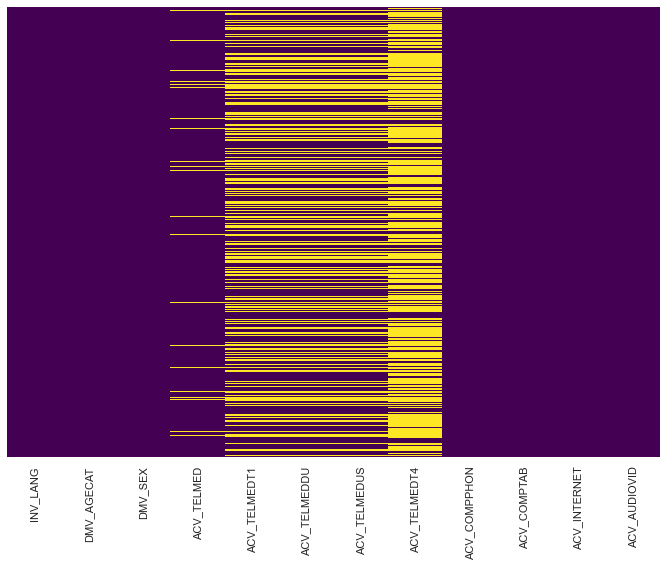

In [72]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(span_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

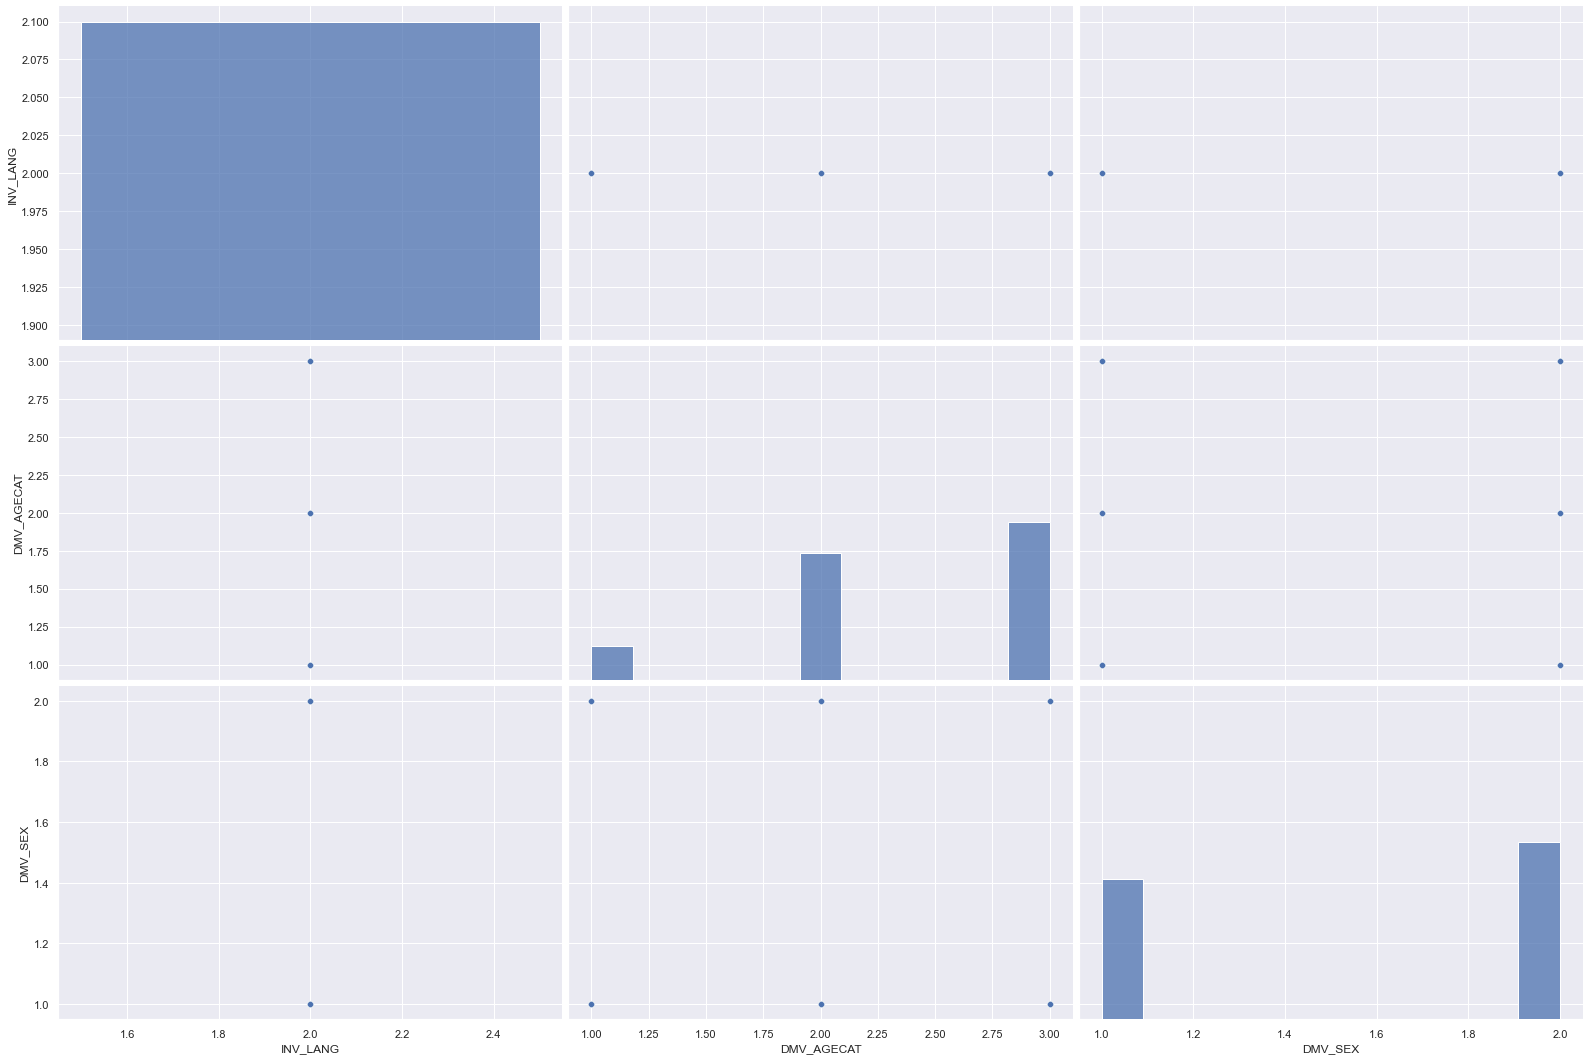

In [73]:
sns.pairplot(span_df, height=5, aspect=1.5);